In [37]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [38]:
# Caminho do arquivo
url = 'https://raw.githubusercontent.com/aleeeeff/projetoaplicado2_grupo3/main/dataset/Vendas.xlsx'
df = pd.read_excel(url)

In [39]:
# Visualizando as primeiras linhas
print("Primeiras linhas do Dataset:")
print(df.head())


Primeiras linhas do Dataset:
  DataEmissao      NFe  cdProduto       Produto      Grupo Produto  \
0  2019-03-13  2172961        257   Produto 257          Fermentos   
1  2019-03-12  2171374       2472  Produto 2472          Fermentos   
2  2019-03-12  2172788        157   Produto 157        Leite em Pó   
3  2019-03-12  2172788        210   Produto 210  Farinhas de Trigo   
4  2019-03-12  2172788       1216  Produto 1216  Farinhas de Trigo   

  Linha Produto  cdVendedor        Vendedor     Supervisor          Gerente  \
0     Alimentos         215  Carla Ferreira   Diego Araujo    Victor Castro   
1     Alimentos         326     Julia Silva  Sofia Ribeiro  Gabriel Azevedo   
2     Alimentos         102  Gustavo Barros    Emily Rocha    Victor Castro   
3     Alimentos         102  Gustavo Barros    Emily Rocha    Victor Castro   
4     Alimentos         102  Gustavo Barros    Emily Rocha    Victor Castro   

  Equipe Vendas  QtdItens  ValorUnitario  
0        Varejo         6       

In [40]:
# Convertendo a coluna 'DataEmissao' para formato de data
df['DataEmissao'] = pd.to_datetime(df['DataEmissao'], errors='coerce')


In [41]:
# Criando a coluna 'ValorTotal'
df['ValorTotal'] = df['QtdItens'] * df['ValorUnitario']

In [42]:
# Removendo linhas com valores nulos
df = df.dropna()


In [43]:
# Selecionando variáveis independentes (X) e dependente (y)
X = df[['QtdItens', 'ValorUnitario']]
y = df['ValorTotal']

In [44]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Criando e treinando o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [46]:
# Fazendo previsões
y_pred = modelo.predict(X_test)

In [47]:
# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [48]:
print("\nMétricas de Avaliação do Modelo:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")


Métricas de Avaliação do Modelo:
Erro Quadrático Médio (MSE): 62846.25
Raiz do Erro Quadrático Médio (RMSE): 250.69
Coeficiente de Determinação (R²): 0.40


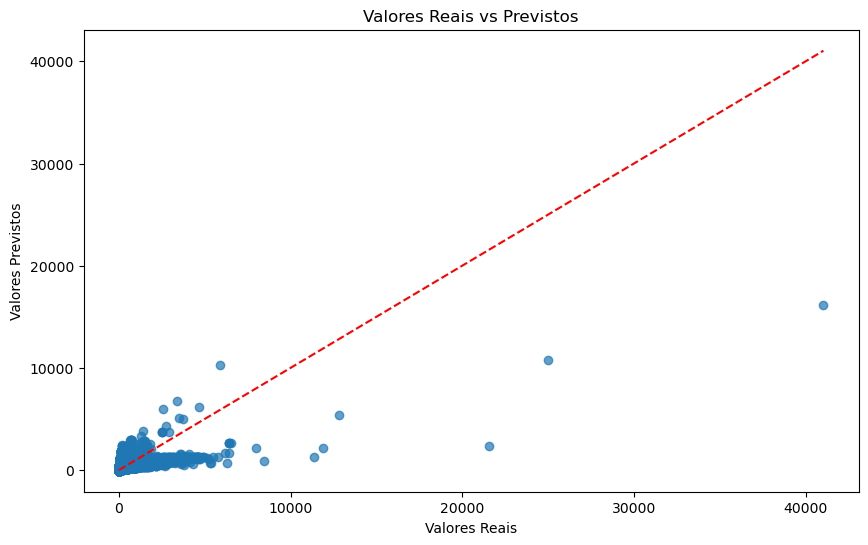

In [49]:
# Plotando resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()